# LOADING DATA

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
Housing=pd.read_csv('Bengaluru_House_Data.csv')

In [52]:
Housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# DATA PRE-PROCESSING

### Dropping the 'society' column


In [53]:
Housing=Housing.drop(["society"],axis=1)

In [54]:
Housing.isna().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

### Dropping the rows where 'location' has null values

In [55]:
Housing=Housing.dropna(subset=["location"])

In [56]:
Housing.isna().sum()

area_type         0
availability      0
location          0
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

### Checking the Correlation of the features

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [58]:
check_corr=Housing.copy()

In [59]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [60]:
encoder=OrdinalEncoder()

In [61]:
check_corr_encoded=encoder.fit_transform(check_corr)

In [62]:
check_corr_encoded_corr=pd.DataFrame(check_corr_encoded).corr()

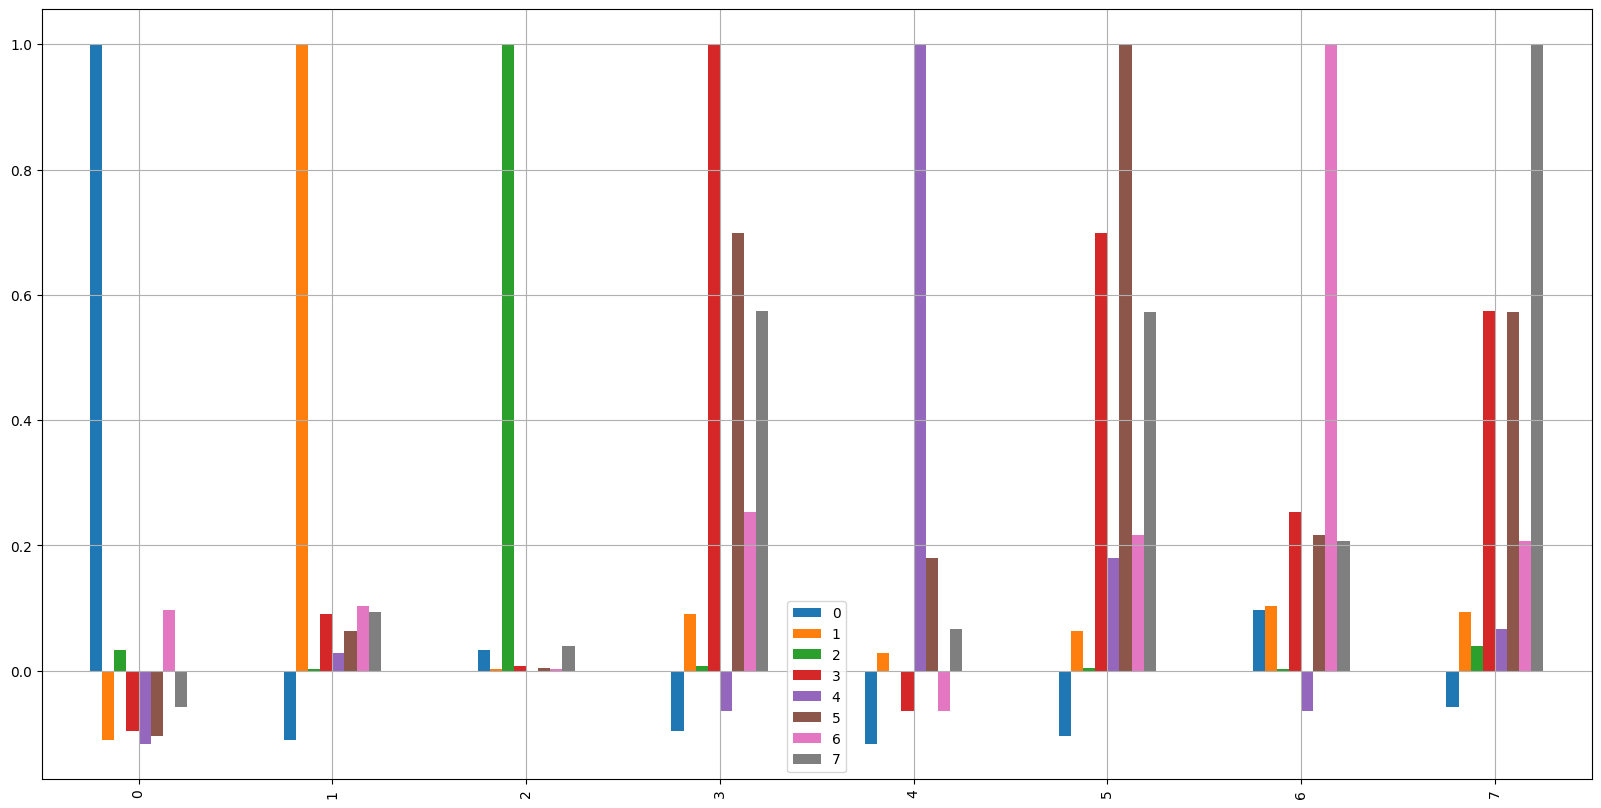

In [63]:
check_corr_encoded_corr.plot(kind="bar",figsize=(20,10),grid=True,legend=True)
plt.show()

### Filling the null values of 'balcony' with the median value

In [64]:
Housing.count().sort_values(ascending=False)

area_type       13319
availability    13319
location        13319
total_sqft      13319
price           13319
size            13303
bath            13246
balcony         12710
dtype: int64

In [65]:
median_balcony=Housing["balcony"].median()

In [66]:
Housing["balcony"].fillna(value=median_balcony,inplace=True)

In [67]:
Housing.count().sort_values(ascending=False)

area_type       13319
availability    13319
location        13319
total_sqft      13319
balcony         13319
price           13319
size            13303
bath            13246
dtype: int64

### Dropping the rows where 'size' has null values

In [68]:
Housing=Housing.dropna(subset=["size"])

In [69]:
Housing.count().sort_values(ascending=False)

area_type       13303
availability    13303
location        13303
size            13303
total_sqft      13303
balcony         13303
price           13303
bath            13246
dtype: int64

### Filling the null values of 'bath' with the median value

In [70]:
Housing["bath"]=Housing["bath"].fillna(value=Housing["bath"].median())

In [71]:
Housing.count().sort_values(ascending=False)

area_type       13303
availability    13303
location        13303
size            13303
total_sqft      13303
bath            13303
balcony         13303
price           13303
dtype: int64

### Encoding the features: 'area_type', 'availability', 'location'


In [72]:
df=Housing.copy()

In [73]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [74]:
len(Housing["area_type"].unique())

4

In [75]:
df = pd.get_dummies(df, columns=['area_type', 'availability', 'location'], drop_first=True)

In [76]:
df.head()

,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Nov,availability_15-Aug,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,2 BHK,1056,2.0,1.0,39.07,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4 Bedroom,2600,5.0,3.0,120.00,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3 BHK,1440,2.0,3.0,62.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3 BHK,1521,3.0,1.0,95.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2 BHK,1200,2.0,1.0,51.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Encoding the feature: 'size'

In [77]:
df['size'] = df['size'].astype('category').cat.codes

In [78]:
df["size"].unique()

array([13, 19, 16, 18, 24, 17,  0,  2,  1, 28, 14, 26, 21, 25, 23, 22,  5,
       29, 30, 15,  4,  6,  3, 12, 10, 20,  9, 27,  7,  8, 11], dtype=int8)

In [79]:
len(df["size"].unique())

31

In [80]:
df.head()

,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Nov,availability_15-Aug,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,13,1056,2.0,1.0,39.07,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,19,2600,5.0,3.0,120.00,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,16,1440,2.0,3.0,62.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16,1521,3.0,1.0,95.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13,1200,2.0,1.0,51.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### Feature Engineering of 'total_sqft'
Coverting the range-values of 'total_sqft' to float using the mean.

Dropping rows where 'total_sqft' has string values.

Filling the null values of 'total_sqft' with the medain value.

In [81]:
def sqrt_ft_to_num(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [82]:
df["total_sqft"]=df["total_sqft"].apply(sqrt_ft_to_num)

In [83]:
index_to_delete = df[df['total_sqft'] == '38Guntha'].index

df = df.drop(index_to_delete)

df = df.reset_index(drop=True)


In [84]:
print(index_to_delete)

Index([], dtype='int64')


In [85]:
median_sqft=df["total_sqft"].median()

In [86]:
df["total_sqft"].fillna(value=median_sqft,inplace=True)

In [87]:
df.head(10)

,size,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_14-Nov,availability_15-Aug,...,location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,"location_white field,kadugodi",location_whitefiled
0,13,1056.0,2.0,1.0,39.07,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,19,2600.0,5.0,3.0,120.00,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,16,1440.0,2.0,3.0,62.00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16,1521.0,3.0,1.0,95.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13,1200.0,2.0,1.0,51.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,13,1170.0,2.0,1.0,38.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,18,2732.0,4.0,2.0,204.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,18,3300.0,4.0,2.0,600.00,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,16,1310.0,3.0,1.0,63.25,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,24,1020.0,6.0,2.0,370.00,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Splitting the data for Training and Testing

In [88]:
X=df.drop(["price"],axis=1)
y=df["price"]

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [90]:
len(X_train),len(X_test),len(y_train),len(y_test)

(10642, 2661, 10642, 2661)

# MODELS

### Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
LR_model=LinearRegression()

In [93]:
LR_model.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred_LR = LR_model.predict(X_test)

In [95]:
LR_model.score(X_test,y_test)

0.647703262880724

Mean Squared Error & R-squared

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
mse = mean_squared_error(y_test, y_pred_LR)
r2 = r2_score(y_test, y_pred_LR)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8678.357658706913
R-squared: 0.647703262880724


### Decision Tree

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
DT_model=DecisionTreeRegressor()


In [100]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [101]:
y_pred_DT = DT_model.predict(X_test)

In [102]:
DT_model.score(X_test,y_test)

0.6133867739801747

### Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
RF_model=RandomForestRegressor()

In [105]:
RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [106]:
y_pred_RF = RF_model.predict(X_test)

In [107]:
RF_model.score(X_test,y_test)

0.7595180620166948

### XGBRegressor

In [108]:
from xgboost import XGBRegressor

In [109]:
xgb_model = XGBRegressor()

In [110]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [111]:
y_pred_XGB = xgb_model.predict(X_test)

# PLOTS

### Plot for Decision Tree

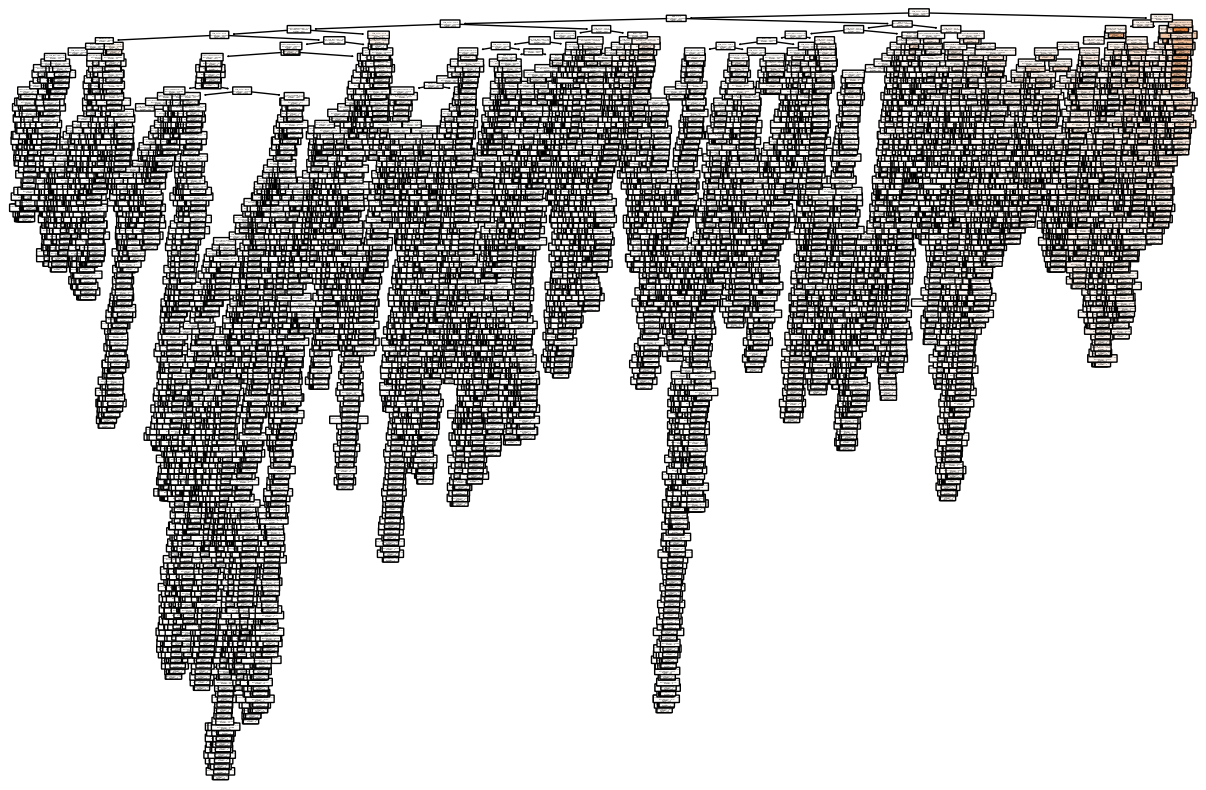

In [112]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(DT_model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [113]:
from sklearn.ensemble import RandomForestRegressor

feature_importances = RF_model.feature_importances_


In [114]:
len(feature_importances)

1389

### Plot for Random Forest

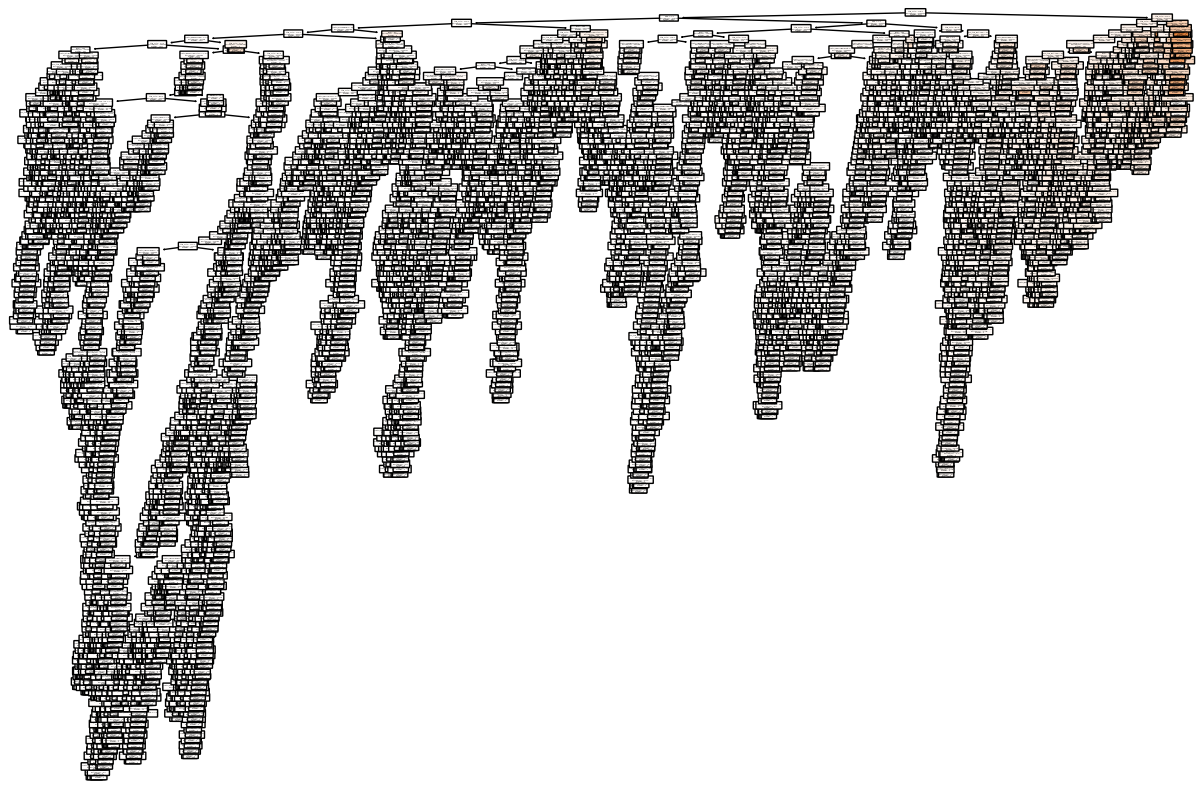

In [115]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(RF_model.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.show()


# Comparison of Mean Absolute Error and Mean Squared Error for Different Models

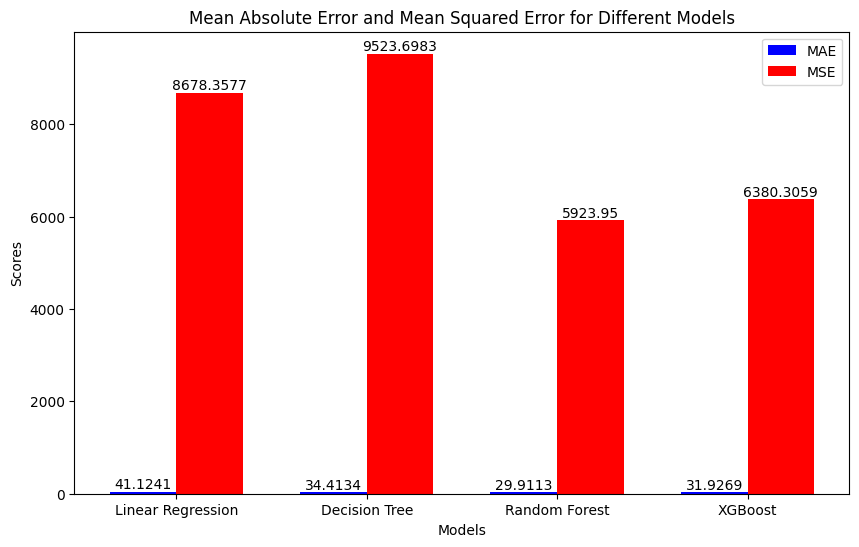

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calculating MAE and MSE for each model
mae_LR = mean_absolute_error(y_test, y_pred_LR)
mse_LR = mean_squared_error(y_test, y_pred_LR)

mae_DT = mean_absolute_error(y_test, y_pred_DT)
mse_DT = mean_squared_error(y_test, y_pred_DT)

mae_RF = mean_absolute_error(y_test, y_pred_RF)
mse_RF = mean_squared_error(y_test, y_pred_RF)

mae_XGB = mean_absolute_error(y_test, y_pred_XGB)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)

# Storing the results in lists for plotting
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores = [mae_LR, mae_DT, mae_RF, mae_XGB]
mse_scores = [mse_LR, mse_DT, mse_RF, mse_XGB]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

bar1 = ax.bar(index, mae_scores, bar_width, label='MAE', color='b')
bar2 = ax.bar(index + bar_width, mse_scores, bar_width, label='MSE', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Mean Absolute Error and Mean Squared Error for Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Displaying the scores on top of the bars
for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()
